In [1]:
import logging
import numpy
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

from functions import *
from fair_func import *

In [2]:
from pandas.api.types import CategoricalDtype

In [3]:
import analyser as ans

In [4]:
#!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

#!pip install PyALE
from PyALE import ale

In [5]:
data = pd.read_csv('RAIdata.csv')

In [6]:
data.shape

(61321, 206)

In [7]:
data["Default"].value_counts()

0.0    46752
1.0    14569
Name: Default, dtype: int64

<div class="alert alert-block alert-success">
<b>Inference:</b>
We can infer that the data has more 0's (False) when it comes to defaulter compared to 1's (True).  
Thus there are more non-defaulters than defaulters.
</div>

In [8]:
datatest=data

In [9]:
datatest['MonthlyPayment'].fillna((datatest['MonthlyPayment'].mean()), inplace=True)
datatest['ExpectedLoss'].fillna((datatest['ExpectedLoss'].mean()), inplace=True)
datatest['ProbabilityOfDefault'].fillna((datatest['ProbabilityOfDefault'].mean()), inplace=True)
datatest['DebtToIncome'].fillna((datatest['DebtToIncome'].mean()), inplace=True)
datatest['FreeCash'].fillna((datatest['FreeCash'].mean()), inplace=True)
datatest['LossGivenDefault'].fillna(0, inplace=True)

In [10]:
target=['Default']

In [11]:
x=datatest.drop(columns=['Age', 'Default'])
y=datatest['Default']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6699)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
pred_0 = clf.predict_proba(X_test)[:,0]
pred_0

array([0.65857252, 0.82042363, 0.81830261, ..., 0.81329074, 0.65231048,
       0.83254225])

In [15]:
pred_p = clf.predict(X_test)
pred_p

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
y_test

44756    0.0
60814    1.0
42611    1.0
42743    0.0
12895    1.0
        ... 
18117    1.0
16381    0.0
41852    1.0
4219     0.0
35003    0.0
Name: Default, Length: 18397, dtype: float64

In [17]:
clf.predict_proba(X_test)

array([[0.65857252, 0.34142748],
       [0.82042363, 0.17957637],
       [0.81830261, 0.18169739],
       ...,
       [0.81329074, 0.18670926],
       [0.65231048, 0.34768952],
       [0.83254225, 0.16745775]])

In [18]:
f_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
f_imp = pd.DataFrame(f_imp, columns=['coeff'])
f_imp = f_imp.reset_index()
f_imp = f_imp.sort_values('coeff', ascending=False)

In [19]:
X_test.shape

(18397, 204)

- Pietra Index / Ricci-Schutz coefficient
- Cramer-von-Mises
- Hosmer-Lemeshow Test (p-value)
- 

# DRIFTS

- Covariate Shift: Shift in the independent variables. 
- Prior Probability Shift: Shift in the target variable.
- Concept Drift: Shift in the relationship between the independent and the target variable

# Data Drift

Predictive models are fundamentally based on finding a mapping between the input data and the target variable. Typically, our goal is to learn a model from historical data with the intention of applying the updated model to new unseen data to derive insights. However, models that assume this underlying mapping to be static over time becomes susceptible to predictive performance degradation. 

Data drift refers to the phenomenon of dynamically evolving latent relationships within the data, causing a shift in the relationship between the $x$ independent variables and the $y$ target variable. This manifests as a change in the joint distribution of features and the label $P(x, y)$ between the source distribution and the live distribution. 

$$ P(x_s, y_s) \neq P(x_l, y_l) $$

where $s$ is the source distribution and $l$ the live distribution. 

From a Bayesian perspective, this data drift can be attributed to 3 fundamental forms of changes:

1. **Covariate shift**: change in the marginal probability distribution of independent variables, which doesn't affect the decision boundary. Also, referred as "virtual" drift.

$$P(x_s) \neq P(x_l)$$

2. **Prior Probability shift**: change in the marginal probability distribution target variable.

$$P(y_s) \neq P(y_l)$$

3. **Concept drift**: change in $p(y | x)$ i.e posterior probability distribution without change in $p(x)$. Also referred as the "real" concept drift.

$$ P(y_l|x_l) \neq P(y_l|x_l) \quad \& \quad P(x_s) = P(x_l) $$





# Covariate drift

Covariate shift is the change in the distribution of the covariates specifically, that is, the independent variables. This is normally due to changes in state of latent variables, which could be temporal (even changes to the stationarity of a temporal process), or spatial, or less obvious.

It can also be seen as looking at an unexplored “area” of the data space.

It's a fascinating area of study, as it can be seen naturally in different ways. In the data space way, we can try to deal with it by clever extrapolation, although this doesn't often work as well as alternatives such as re-estimating latent variables or attempts at making a prediction function adaptive to the domain.

The easiest way to see if we have indeed gone out of our original covariate space requires a special conditions, such as stationary time variables and oftem, pure numeric data. In this case, we can calculate the convex hull of the data space and test if our new data point is outside it. Of course, this gets computationally expensive, so it's often not done unless something is obviously wrong with our predictions. Of course, it is also application dependant.

Covariate shift
Of all the manifestations of dataset shift, the simplest to understand is covariate shift.
Covariate shift is the change in the distribution of the covariates specifically, that is, the independent variables. This is normally due to changes in state of latent variables, which could be temporal (even changes to the stationarity of a temporal process), or spatial, or less obvious. — Quora
Covariate shift is the scholarly term for when the distribution of the data (i.e. our input features) changes.

ptraining(X) <!= ptest(X)

Here covariate drift is defined as Non-Intersection Distance between two distributions. More formally, $$d(P,Q) = 1 - sum_i min(P_i, Q_i)$$. The larger the distance the more different are two
distributions.
Covariate shift refers to the change in the distribution of the **independent variables** present in the training/source data and the live data. $P(x_s) \neq P(x_l)$

Each independent variable is binned to form $i$ bins from both the source/actual distribution and live/expected distribution. Then, the shift in the variable from the source compared to the live distribution is calculated from below equation.


In [ ]:
#https://github.com/ModelOriented/drifter

In [648]:
def calculate_covariate_drift(data_train, data_live, bins=20):
    # variables present in both datasets
    joint_var = data_train[data_train.columns.intersection(data_live.columns)].columns
    # distances between variables
    distances = int(len(joint_var))
    
    distances = {}
   
    for x in joint_var.values:
        distances[x] = dict(value=calculate_distance(data_train[x], data_live[x], bins))

    return distances

def calculate_distance(data_train, data_live, bins = 20):
    col=data_train
    if isinstance(col,int):
        
        com_list = list(data_train) + list(data_live)
        com_list = pd.DataFrame(com_list)
        rank = com_list.rank()
        after_cuts = pd.DataFrame(data_train, data_live)
    else:
        
        com_list = list(data_train) + list(data_live)
        com_list = pd.DataFrame(com_list)
        rank = com_list.rank()
        
        after_cuts = pd.cut(np.array(rank).ravel(), bins)
        

    l1 = list(np.repeat(1, len(data_train)))
    l2 = list(np.repeat(2, len(data_live)))
    master_list = l1 + l2
    
    x = pd.crosstab(after_cuts, pd.Series(master_list))
    #print (x)
    matrix = x / x.sum()
    #print (matrix)
    value =  1 - np.sum(matrix.apply(np.min, axis=1))
    
    return value

def cal_threshold(d):
    for k, v in d.items():
        if v["value"] > 0.40:

            d[k]['Thresh'] = "High Drift"
        elif v["value"] > 0.30:

            d[k]['Thresh'] = "Medium Drift"
        elif v["value"] > 0.20:

            d[k]['Thresh'] = "Low Drift"
        else:
            d[k]['Thresh'] = "No Drift"
    return d

In [649]:
d = calculate_covariate_drift(X_train, X_test)

In [650]:
d

{'AppliedAmount': {'value': 0.016646942295449052},
 'DebtToIncome': {'value': 0.00498825318578644},
 'ExpectedLoss': {'value': 0.011837907635337763},
 'LiabilitiesTotal': {'value': 0.013183970159348135},
 'FreeCash': {'value': 0.006286850482843276},
 'IncomeFromChildSupport': {'value': 0.0010630389830255105},
 'IncomeFromFamilyAllowance': {'value': 0.003489312158528546},
 'IncomeFromLeavePay': {'value': 0.0010256348848310948},
 'IncomeFromPension': {'value': 0.0010385187015704567},
 'IncomeFromPrincipalEmployer': {'value': 0.008287617058542196},
 'IncomeFromSocialWelfare': {'value': 0.0009173292714587111},
 'IncomeOther': {'value': 0.0015326929800349998},
 'IncomeTotal': {'value': 0.010766275219995403},
 'Interest': {'value': 0.012614515336976995},
 'LoanDuration': {'value': 0.009221815341479589},
 'LossGivenDefault': {'value': 0.009635162475161163},
 'MonthlyPayment': {'value': 0.013569517172243417},
 'ProbabilityOfDefault': {'value': 0.013996596575309939},
 'NrOfDependantslessthan3':

In [28]:
dd = cal_threshold(d)

In [29]:
ddd = pd.DataFrame(dd).T
ddd['cat']=ddd.index
ddd=ddd.head(10)

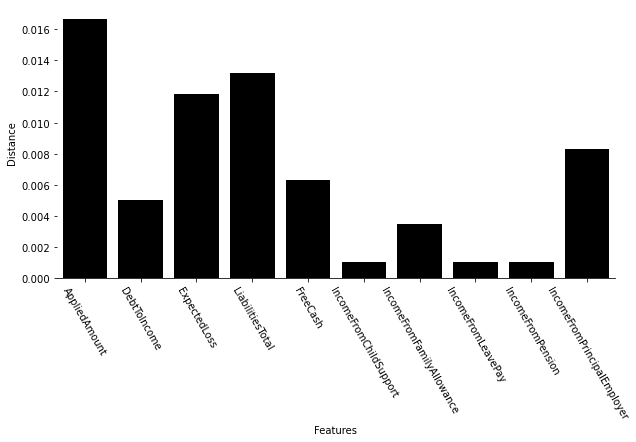

In [30]:
fig = plt.figure(figsize=(10,5))
p = sns.barplot(x='cat', y='value', data=ddd, palette=["black"])
p.set(xlabel='Features', ylabel='Distance')
plt.xticks(rotation=-60)
sns.despine(left=True)

In [732]:
import random
DAY=[]
value = []
Th=[]

X_train['AppliedAmount2'] = X_train['AppliedAmount']
X_test['AppliedAmount2'] = X_test['AppliedAmount']

mu=X_test['AppliedAmount'].mean()
sd=X_test['AppliedAmount'].std()

for i in range(1,31):
    
    zero = random.randint(0, 1)
    days = i
    
    noise = np.random.normal(mu/3000, sd/1000)
   
    
    X_test['AppliedAmount2'] = X_test['AppliedAmount2'] + (noise*zero)
    
    d = calculate_covariate_drift(pd.DataFrame(X_train['AppliedAmount2']), pd.DataFrame(X_test['AppliedAmount2']))
    dd = cal_threshold(d)
    DAY.append(days)
    
    value.append(dd.get('AppliedAmount2').get('value'))
    Th.append(dd.get('AppliedAmount2').get('Thresh'))

CoDrift = pd.DataFrame({"Day":DAY, "CoDrift":value, "Threshold":Th})


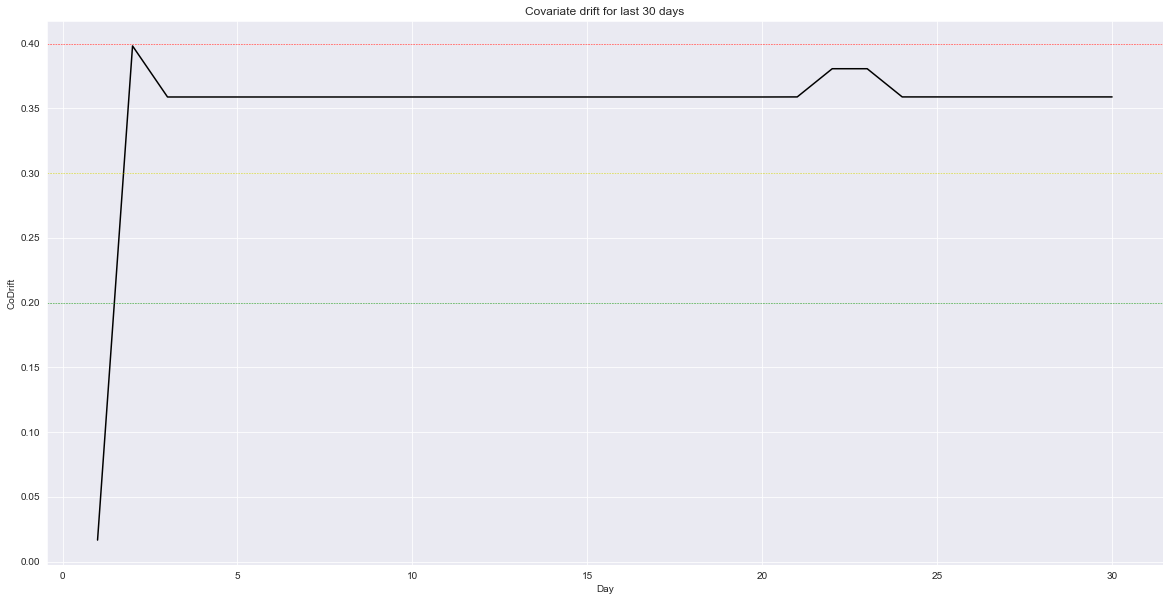

In [733]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=CoDrift, x="Day", y="CoDrift", color='black')
plt.title("Covariate drift for last {} days".format(CoDrift['Day'].max()))
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.5)
plt.axhline(y=0.3, color='y', linestyle='--', linewidth=.5)
plt.axhline(y=0.2, color='g', linestyle='--', linewidth=.5)

plt.show()

# Prior Probability Shift: Shift in the target variable.


Prior Probability shift refers to the change in the distribution of the **target variable** in the training/source data and the live data. $P(y_s) \neq P(y_l)$

The target variable is binned to form $i$ bins from both the source/actual distribution and live/expected distribution. Then, the shift in the target variable from the source compared to the live distribution is calculated from below equation.

In [737]:
import random
DAY=[]
value = []
Th=[]


p_original = pd.DataFrame({'Prediction':pred_0})
p_live = p_original

mu=p_original.mean()
sd=p_original.std()
    
    
for i in range(1,31):
    
    
    zero = random.randint(0, 1)
    #print(zero)
    days = i

    noise = np.random.normal(mu/1000, sd/100)
    noise = noise * zero
 

    p_live = p_live + noise*zero
    

   
    
    
    d = calculate_covariate_drift(pd.DataFrame(p_original), pd.DataFrame(p_live))
    dd = cal_threshold(d)
    DAY.append(days)
    value.append(dd.get('Prediction').get('value'))
    Th.append(dd.get('Prediction').get('Thresh'))

CoDrift_PP = pd.DataFrame({"Day":DAY, "CoDrift":value, "Threshold":Th})


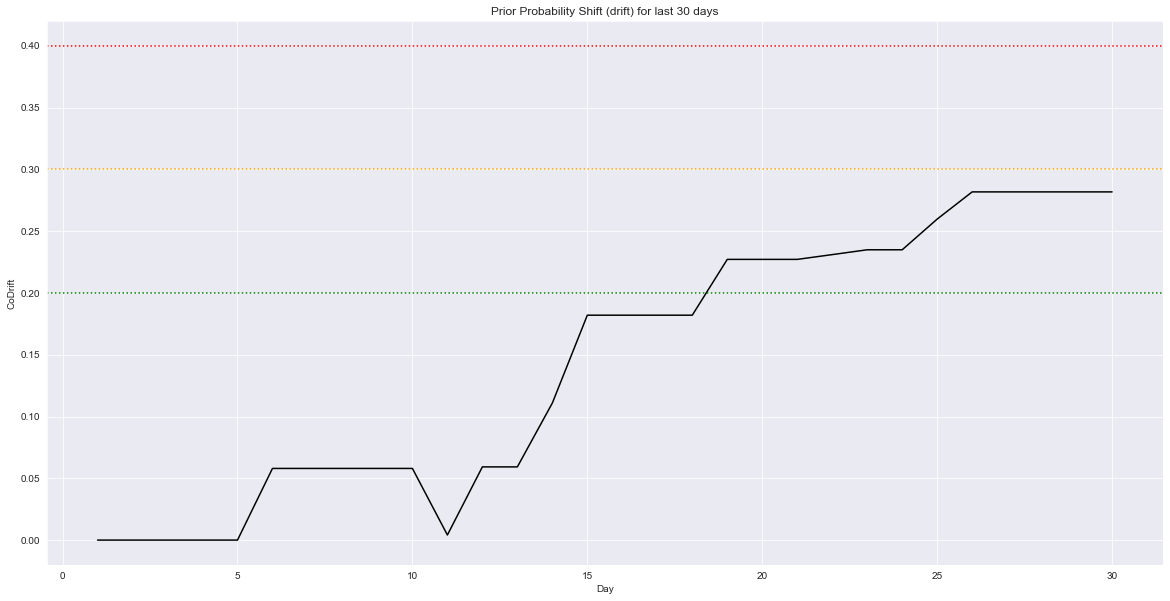

In [738]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=CoDrift_PP, x="Day", y="CoDrift", color='black')
plt.title("Prior Probability Shift (drift) for last {} days".format(CoDrift_PP['Day'].max()))
plt.axhline(y=0.4, color='r', linestyle='dotted')
plt.axhline(y=0.3, color='orange', linestyle='dotted')
plt.axhline(y=0.2, color='g', linestyle='dotted')

plt.show()

# Jensen–Shannon divergence 

Let P(x) and Q(x), x ∈ 𝛘, be two probability mass functions (i.e. discrete distributions). Then D(P||Q) ≥ 0 with equality if and only if P(x) = Q(x) for all x. For the most part, D(P||Q) ≠ D(Q||P). Therefore, KL divergence is not a real distance metric because it is not symmetric and does not satisfy the triangle inequality. It is important to notice that the KL divergence is defined only if for all x, Q(x) = 0 → P(x) = 0.

An alternate approach is the Jensen-Shannon divergence (JS divergence), another method of measuring the similarity between two probability distributions. It is a symmetric and smoothed version of the KL divergence and can be used as a distance metric.

In [48]:
def js_divergence(p, q):
    m = (1./2.)*(p + q)
    return (1./2.)*kl_divergence(p, m) + (1./2.)*kl_divergence(q, m)

The KL divergence seems to be more sensitive to small changes in the original data

In probability theory and statistics, the Jensen–Shannon divergence is a method of measuring the similarity between two probability distributions. It is also known as information radius (IRad)[1] or total divergence to the average.[2] It is based on the Kullback–Leibler divergence, with some notable (and useful) differences, including that it is symmetric and it always has a finite value. The square root of the Jensen–Shannon divergence is a metric often referred to as Jensen-Shannon distance.

Compute the Jensen-Shannon distance (metric) between two 1-D probability arrays. This is the square root of the Jensen-Shannon divergence.

The Jensen-Shannon distance between two probability vectors p and q is defined as

$\frac{\sqrt{D(p||m) + D(q||m)}}{2}$

where $m = \frac{1}{2} (p + q)$

where  is the pointwise mean of  and  and  is the Kullback-Leibler divergence.

This routine will normalize p and q if they don’t sum to 1.0.





https://medium.com/datalab-log/measuring-the-statistical-similarity-between-two-samples-using-jensen-shannon-and-kullback-leibler-8d05af514b15

https://github.com/michaelnowotny/divergence/blob/master/divergence/continuous.py

In [739]:
from scipy.spatial import distance
distance.jensenshannon([1.0, 0.0], [0.5, 0.5])

0.46450140402245893

In [743]:
import random
DAY=[]
value = []

mu=p_original.mean()
sd=p_original.std()
p_original = pred_0
p_live = p_original

for i in range(1,31):
    
    zero = random.randint(0, 1)
    #print(zero)
    days = i
    
    
    
    noise = np.random.normal(mu, sd)
    noise = noise * zero
    
   
    p_live = list(map(lambda x:noise+x, p_live))
    
   
    
    dd = distance.jensenshannon(p_original, p_live)
    DAY.append(days)
    #print (dd)
    value.append(dd)

JS = pd.DataFrame({"Day":DAY, "JSD":value})


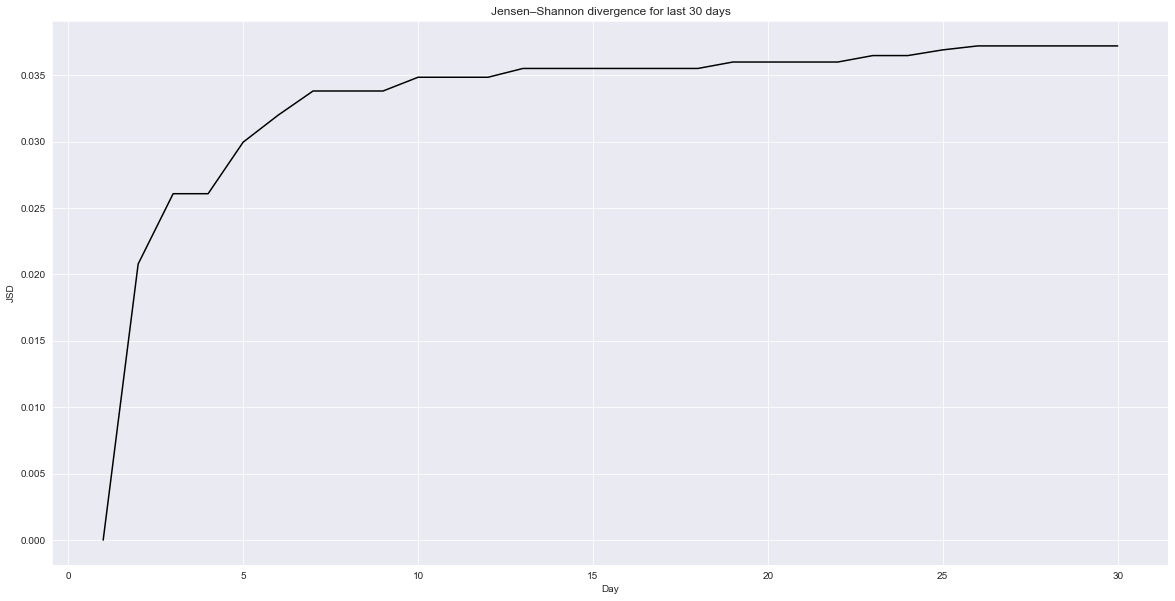

In [745]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=JS, x="Day", y="JSD", color='black')
plt.title("Jensen–Shannon divergence for last {} days".format(CoDrift['Day'].max()))
#plt.axhline(y=0.4, color='r', linestyle='--')
#plt.axhline(y=0.3, color='y', linestyle='--')
#plt.axhline(y=0.2, color='g', linestyle='--')

plt.show()

# Wasserstein distance

In mathematics, the Wasserstein distance or Kantorovich–Rubinstein metric is a distance function defined between probability distributions on a given metric space {\displaystyle M}M.

Intuitively, if each distribution is viewed as a unit amount of earth (soil) piled on {\displaystyle M}M, the metric is the minimum "cost" of turning one pile into the other, which is assumed to be the amount of earth that needs to be moved times the mean distance it has to be moved. Because of this analogy, the metric is known in computer science as the earth mover's distance.

https://arxiv.org/pdf/1509.02237.pdf

Wasserstein (or EMD), once you multiply it by your bandwith, measures the "work" necessary to transform one distribution into another (by solving the optimal transport problem). Roughly that is the integral difference between the two distributions, multiplied by the distance between their centers (NOTE: this is an approximation only for the purpose of giving a simple explanation here, but Wassertein makes NO USE of centers/average of the distributions and IT DOES USE a distance matrix that is user-provided and can be asymmetric or use non-linear steps -- The figure attached makes use of a symmetric distance matrix built with linear steps equal to the bin size of the distributions).



Wasserstein Distance is a measure of the distance between two probability distributions. It is also called Earth Mover’s distance, short for EM distance, because informally it can be interpreted as the minimum energy cost of moving and transforming a pile of dirt in the shape of one probability distribution to the shape of the other distribution.

Unlike the Kullback-Leibler divergence, the Wasserstein metric is a true probability metric and considers both the probability of and the distance between various outcome events. Unlike other distance metrics like KL-divergence, Wasserstein distance provide a meaningful and smooth representation of the distance between distributions.
These properties make the Wasserstein well-suited to domains where an underlying similarity in outcome is more important than exactly matching likelihoods.

When considering the advantages of Wasserstein metric compared to KL divergence, then the most obvious one is that W is a metric whereas KL divergence is not, since KL is not symmetric (i.e. $𝐷_{𝐾𝐿}(𝑃||𝑄)≠𝐷_{𝐾𝐿}(𝑄||𝑃)$ in general) and does not satisfy the triangle inequality (i.e. $𝐷_{𝐾𝐿}(𝑅||𝑃)≤𝐷_{𝐾𝐿}(𝑄||𝑃) + 𝐷_{𝐾𝐿}(𝑅||𝑄)$ does not hold in general).

As what comes to practical difference, then one of the most important is that unlike KL (and many other measures) Wasserstein takes into account the metric space and what this means in less abstract terms is perhaps best explained by an example (feel free to skip to the figure, code just for producing it):

In [62]:
import scipy
from scipy import *

In [746]:
from scipy.stats import wasserstein_distance
wasserstein_distance([0, 1, 3], [5, 6, 8])

5.0

In [747]:
p_original = X_train['AppliedAmount']

In [748]:
# define samples this way as scipy.stats.wasserstein_distance can't take probability distributions directly
mu=p_original.mean()
sd=p_original.std()
zero = random.randint(0, 1)
noise = np.random.normal(mu, sd)
noise = noise #* zero
p_live = p_original
p_live = list(map(lambda x:noise+x, p_original))

sampP = p_original
sampQ = p_live

noise

6020.040926806663

In [749]:
random.randint(0, 1)

0

In [750]:
# and for scipy.stats.entropy (gives KL divergence here) we want distributions
P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)

In [751]:
print("Wasserstein distance {}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ)))

print("KL divergence {}".format(scipy.stats.entropy(P, Q)))

Wasserstein distance 6020.040926806665
KL divergence 0.0


In [762]:
import random
DAY=[]
value = []
value2 = []

p_original = pred_0
mu=p_original.mean()
sd=p_original.std()
sampP = p_original
p_live = p_original

for i in range(1,31):
    
    zero = random.randint(0, 1)
    #print(zero)
    days = i
    
    noise = np.random.normal(mu/1000, sd/100)
    noise = noise * zero
    
   
    p_live = list(map(lambda x:noise+x, p_live))
    
    
    sampQ = p_live
    
    P = np.unique(sampP, return_counts=True)[1] / len(sampP)
    Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)
   
    
    dd = scipy.stats.wasserstein_distance(sampP, sampQ)
    dd2 = scipy.stats.entropy(P, Q)
    DAY.append(days)
    #print (dd)
    value.append(dd)
    value2.append(dd2)

WD = pd.DataFrame({"Day":DAY, "WD":value, 'KL':value2})

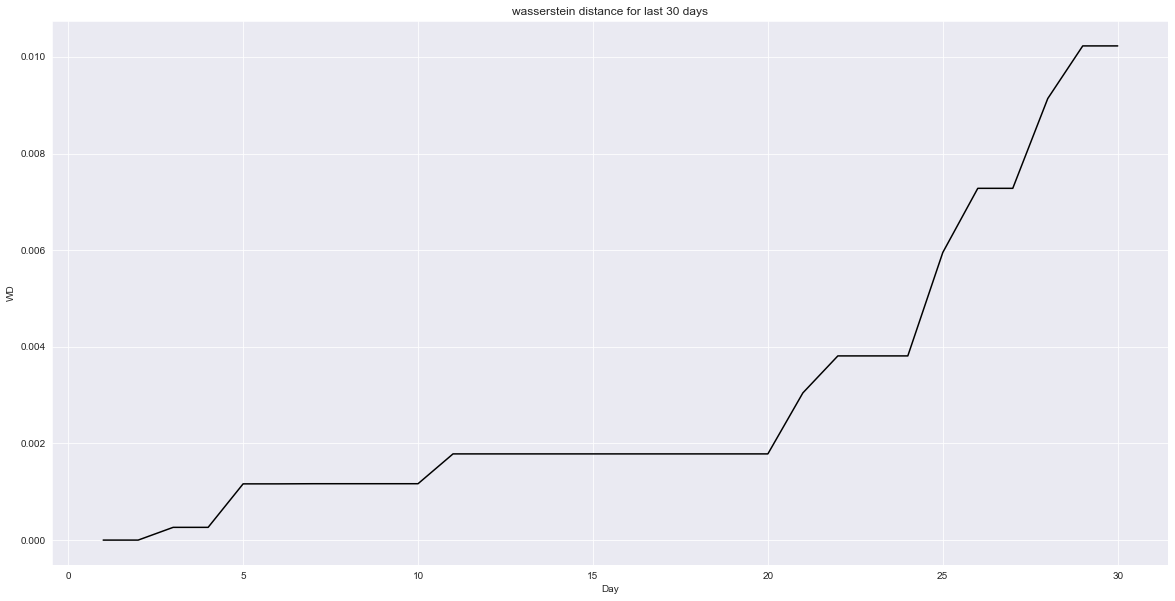

In [763]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=WD, x="Day", y="WD", color='black')
plt.title("wasserstein distance for last {} days".format(WD['Day'].max()))
#plt.axhline(y=0.4, color='r', linestyle='--')
#plt.axhline(y=0.3, color='y', linestyle='--')
#plt.axhline(y=0.2, color='g', linestyle='--')

plt.show()

# STABILITY INDICES

# PSI & CSI

Population Stability Index (PSI): As the name suggests, it looks at the shift of the distribution of a variable across different time internals. Here the focus is only on the dependent variable. For model testing purpose we would compare the In-sample scores (got by scoring the model on the In-sample data or train data) with the Out-of-Time(OOT or test) scores. And for model tracking we would compare the original OOT scores with the new incoming scores from production environment.
In case we have a Out-of-Sample(OOS) or validation population we would compare the OOS scores with the In-sample scores too.

Characteristic Stability Index (CSI): It is the measure of the change in distribution of the independent variables over time. It can be used both for testing and performance tracking in a similar way to PSI, the comparison would be the distribution of variables unlike PSI where it is the model scores.

- Step 1: Decide on which population to use for reference, during testing In-sample will be the reference population and during performance tracking OOT population can be used as reference. (for simplicity sake we will use model testing as our use case)
- Step 2: Rank order the reference scores and then divide them into ten deciles (10 bins of equal size). In case of categorical variables instead of creating bins you can keep them as is, or combine some categories if there are more than 10.
- Step 3: Get the cutoff point used by you to create the reference bins.
- Step 4: Calculate the number of records and % of records in each of the reference bins. They would ideally be same as (i.e. 10%) as we have created the bins of equal sizes. Only in case of some scores occurring very often, or categorical values the bins would be unequal in size.
- Step 5: Apply the cutoff points, used to create the bins for In-sample, to the testing scores(OOT) (and production scores in case of performance tracking). This will help you get the bins for them.
- Step 6: Calculate the number of records and % of record in the testing scores.
- Step 7: Using reference as actual and testing as expected. Calculate the Index for each of the bins using the formula below:


*The formula above had 2 parts which are multiplied with one another.
One is calculated by taking the difference of the values in Step 4 and Step 6. Another is calculated by taking the natural log of the division of the values in Step 4 and Step 6.*

- Step 8: Sum the Index for all the bins to get the PSI

https://www.lexjansen.com/wuss/2017/47_Final_Paper_PDF.pdf

## PSI : Target variable

In [837]:
p_original = pred_0.copy()
mu=p_original.mean()
sd=p_original.std()
zero = random.randint(0, 1)
noise = np.random.normal(mu/100, sd/10)
noise = noise * zero
p_live = p_original + noise*zero

#print(noise)

initial_score = p_original
new_score = p_live

In [838]:
p_live

array([0.65760107, 0.82699822, 0.82268572, ..., 0.81880093, 0.65669066,
       0.84088773])

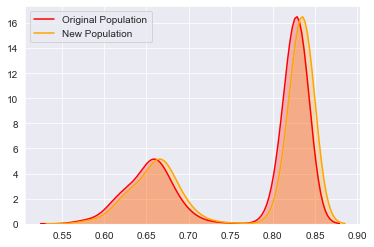

In [839]:
p1 = sns.kdeplot(initial_score, shade=True, label="Original Population", color='red')
p1 = sns.kdeplot(new_score, shade=True, label="New Population", color='orange')

In [840]:
bins = 20
com_list = list(initial_score) + list(new_score)
df = pd.DataFrame({'Combined list':com_list})
df['Rank'] = df['Combined list'].rank()
df['After cuts'] = pd.cut(df['Rank'].ravel(), bins)
master_list = list(np.repeat('Actual', len(initial_score))) + list(np.repeat('Expected', len(new_score)))
bin_df = pd.crosstab(df['After cuts'], pd.Series(master_list)).reset_index()

In [841]:
bin_df.head()

col_0,After cuts,Actual,Expected
0,"(-35.793, 1840.625]",1096,744
1,"(1840.625, 3680.25]",918,922
2,"(3680.25, 5519.875]",1074,765
3,"(5519.875, 7359.5]",986,854
4,"(7359.5, 9199.125]",905,935


In [842]:
score_percents_df = pd.DataFrame({'After cuts':bin_df['After cuts'],'Actual counts':bin_df['Actual'],'Expected counts':bin_df['Expected']})
score_percents_df['Actual Percent'] = bin_df['Actual']/np.sum(bin_df['Actual'])
score_percents_df['Expected Percent'] = bin_df['Expected']/np.sum(bin_df['Expected'])
score_percents_df.head(10)

,After cuts,Actual counts,Expected counts,Actual Percent,Expected Percent
0,"(-35.793, 1840.625]",1096,744,0.059575,0.040441
1,"(1840.625, 3680.25]",918,922,0.049899,0.050117
2,"(3680.25, 5519.875]",1074,765,0.058379,0.041583
3,"(5519.875, 7359.5]",986,854,0.053596,0.046421
4,"(7359.5, 9199.125]",905,935,0.049193,0.050824
5,"(9199.125, 11038.75]",757,1082,0.041148,0.058814
6,"(11038.75, 12878.375]",758,1082,0.041202,0.058814
7,"(12878.375, 14718.0]",1185,641,0.064413,0.034843
8,"(14718.0, 16557.625]",1416,438,0.076969,0.023808
9,"(16557.625, 18397.25]",1124,716,0.061097,0.038919


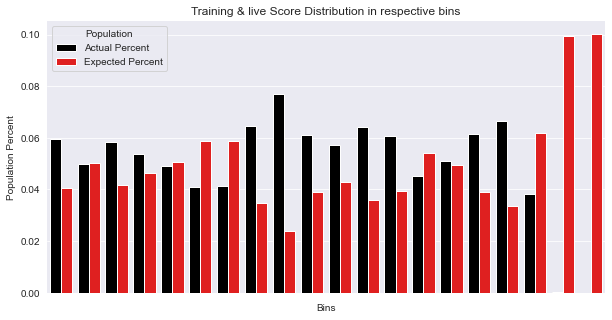

In [843]:
fig = plt.figure(figsize=(10,5))
percents = score_percents_df[['After cuts','Actual Percent', 'Expected Percent']].melt(id_vars=['After cuts']).rename(columns={'variable':'Population', 'value':'Percent'})
p = sns.barplot(x='After cuts', y='Percent', hue='Population', data=percents, palette=["black", "red"])
p.set(xlabel='Bins', ylabel='Population Percent', title='Training & live Score Distribution in respective bins')
p.set(xticklabels=[])
sns.despine(left=True)

Exploratory Data Analysis of the independent variables and target variables from the training/source distribution and the live distribution reveals the need for drift detection.

## Stability Index (SI)

The Stability Index metric enables measurement of how much a variable has shifted in distribution between two samples over time. Its ability to monitor changes in the characteristics of a population makes it useful for diagnosing possible problems in model performance — it serves as a good indicator if the model has stopped predicting accurately due to significant changes in the population distribution.

The main goal of this metric is to determine whether the new data is drastically different from the original data. It is very important to realise that time wise the new data is acquired sooner to the present moment. In the case of credit decisioning our current borrowers and those to come are more likely to look like the new data we've acquired rather than the old data we trained on.

>#### How does SI work?
In light of assessing the population stability of our model.
There are two populations.
- The first or the original population is the one we use to train the model on $P$. 
- The second population consists of all the new data we have acquired $Q$.

We can think of $P$ as the original population distribution, and $Q$ as the new population distribution. Then, take the **Kullback-Leibler divergence** $D_{KL}$ which represents some sort of loss due to using the wrong distribution. 

$$ D_{KL}(P||Q) = \sum_i P_i ln \frac{P_i}{Q_i}$$

Even though $D_{KL}$ measures divergence of $P$ from $Q$, it is technically not a distance measure because the definition is not symmetric, i.e. $ D_{KL}(P||Q) \neq D_{KL}(Q||P)$ . 

However, we can easily obtain a symmetric measure of divergence by taking the sum $D_{KL}(P||Q) + D_{KL}(Q||P)$.

Therefore "**Stability Index**" for two distributions $P$ and $Q$ is defined as the **Symmetrised Kullback-Leibler divergence**. 

$$
\begin{equation}
\begin{split} 
SI(P,Q)
& = D_{KL}(P||Q) + D_{KL}(Q||P) \\
& = \sum_i P_i ln \frac{P_i}{Q_i} + \sum_i Q_i ln \frac{Q_i}{P_i} \\
& = \sum_i P_i ln \frac{P_i}{Q_i} - Q_i ln \frac{P_i}{Q_i} \\
& = \sum_i (P_i - Q_i) ln \frac{P_i}{Q_i} \\
\end{split} 
\end{equation}
$$

$$ SI(P,Q) = D_{KL}(P||Q) + D_{KL}(Q||P) = \sum_i (P_i - Q_i) ln \frac{P_i}{Q_i} $$

Say we have $n$ bins of a variable.
There will be a certain number of borrowers that fall into each bin.
We can then evaluate the proportion of borrowers falling into each bin. Since both populations are distributed in some way across the bins of the variable and we can use this information about these distributions to assess if the populations differ with regard to this variable.

$$ SI = \sum_{i=1}^n \overbrace{\Big[ (\% actual_i - \% expected_i) ln \Big(\frac{\% actual_i}{\% expected_i}\Big) \Big]}^\text{contribution} $$

>***Note:*** if $\%actual$ or $\%expected$ is 0, to avoid numerical instabilities in calculating SI, set that particular contribution to be equal to 0.


In [844]:
def bin_counts(data_train_var, data_live_var, bins):
    # binning with pd.cut
    com_list = list(data_train_var) + list(data_live_var)
    df = pd.DataFrame({'Combined list':com_list})
    df['Rank'] = df['Combined list'].rank()
    df['After cuts'] = pd.cut(df['Rank'].ravel(), bins)
    
    master_list = list(np.repeat('Actual', len(data_train_var))) + list(np.repeat('Expected', len(data_live_var)))
    binned_df = pd.crosstab(df['After cuts'], pd.Series(master_list)).reset_index()
    
    actual_counts = binned_df['Actual']
    expected_counts = binned_df['Expected']
    
    return actual_counts, expected_counts

def stability_index(actual, expected):
    if (actual == 0 or expected == 0):
        return 0
    else:
        return ((actual - expected) * np.log(actual/expected))    
    
def calc_stability_index(data_train_var, data_live_var, bins):
    actual_counts, expected_counts = bin_counts(data_train_var, data_live_var, bins)
    
    actual_percents = actual_counts/np.sum(actual_counts)
    expected_percents = expected_counts/np.sum(expected_counts)
    
    si_value = np.sum(stability_index(actual_percents[i], expected_percents[i]) for i 
                      in range(0, len(expected_percents)))

    return(si_value)

In [845]:
score_percents_df['PSI'] = np.where((score_percents_df['Actual Percent'] == 0) | (score_percents_df['Expected Percent'] == 0), 0, 
                         (score_percents_df['Actual Percent'] - score_percents_df['Expected Percent']) 
                                    * np.log(score_percents_df['Actual Percent'] / score_percents_df['Expected Percent']))


In [846]:
score_percents_df.head()

,After cuts,Actual counts,Expected counts,Actual Percent,Expected Percent,PSI
0,"(-35.793, 1840.625]",1096,744,0.059575,0.040441,7.411984e-03
1,"(1840.625, 3680.25]",918,922,0.049899,0.050117,9.453352e-07
2,"(3680.25, 5519.875]",1074,765,0.058379,0.041583,5.698443e-03
3,"(5519.875, 7359.5]",986,854,0.053596,0.046421,1.031240e-03
4,"(7359.5, 9199.125]",905,935,0.049193,0.050824,5.317973e-05


In [847]:
np.sum(score_percents_df['PSI'])

0.7789812894540256

In [848]:
def calc_psi(train_score, live_score, bins):

    psi = {"target variable": calc_stability_index(train_score, live_score, bins)}
    return psi

In [849]:
calc_psi(initial_score, new_score, bins=20)

{'target variable': 0.7789812894540256}

In [850]:
p_original = pred_0.copy()
mu=p_original.mean()
sd=p_original.std()
zero = random.randint(0, 1)
noise = np.random.normal(mu/100, sd/10)
noise = noise * zero
p_live = p_original + noise*zero

#print(noise)

initial_score = p_original
new_score = p_live

In [904]:
import random
from random import randint
DAY=[]
value = []
Th=[]

p_original = pred_0.copy()
p_live = p_original
mu=p_original.mean()
sd=p_original.std()


for i in range(1,31):
    zero = random.randint(0, 1)
    days = i
    noise = p_original/(randint(5, 9)**4)
    


    p_live = p_live + noise*zero
   
    
    d = calc_stability_index(p_original, p_live, bins=20)
   
    DAY.append(days)
    value.append(d)
    

PSI = pd.DataFrame({"Day":DAY, "CoDrift":value})


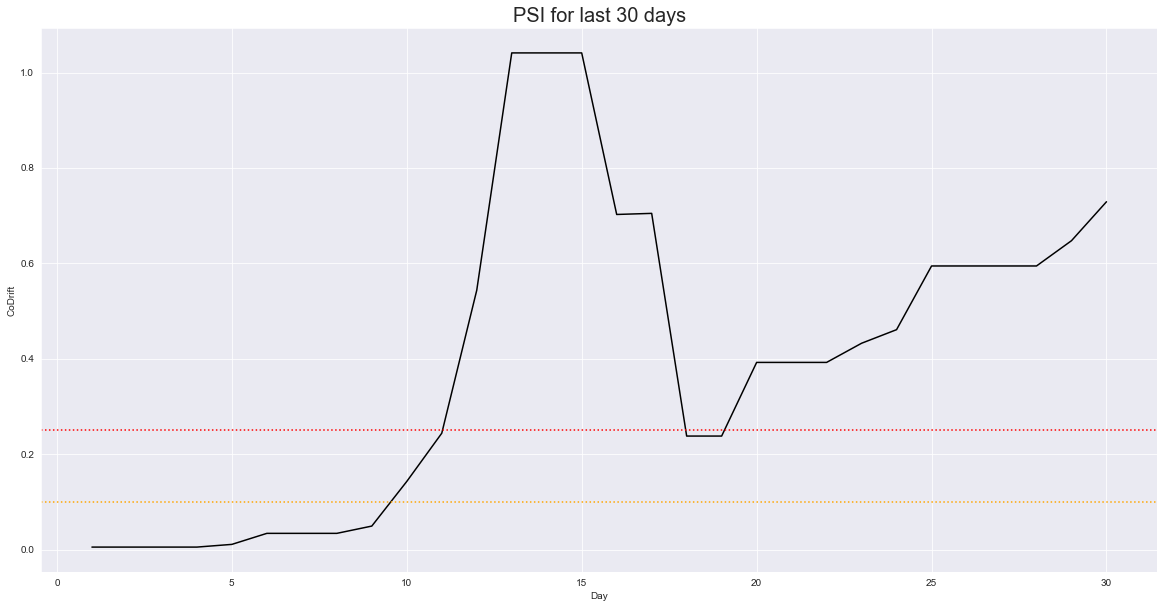

In [905]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=PSI, x="Day", y="CoDrift", color='black')
plt.title("PSI for last {} days".format(PSI['Day'].max()), fontsize=20)
plt.axhline(y=0.25, color='r', linestyle='dotted')
plt.axhline(y=0.10, color='orange', linestyle='dotted')

plt.show()

## Characteristic Stability Index (CSI)


### CSI function

**CSI**, Characteristic Stability Index is a measure of how different the **distribution of the each independent variable** is between the current population and the population used for model development. 

This can help diagnose which changing variable is most influential in causing the model score shift.

In [906]:
def calc_csi(df_train, df_live, bins):
    # independent variables present in both datasets
    joint_var = df_train[df_train.columns.intersection(df_live.columns)].columns
    
    csi={}
    for independent_var in joint_var.values:
        csi[independent_var] = calc_stability_index(df_train[independent_var], df_live[independent_var], bins)
        
    return csi

In [907]:
independent_vars_train = pd.DataFrame(X_train['AppliedAmount'])

In [908]:
mu=X_test['AppliedAmount'].mean()
sd=X_test['AppliedAmount'].std()
zero = random.randint(0, 1)
noise = np.random.normal(mu/1000, sd/10)
independent_vars_live = X_test['AppliedAmount'] + (noise*zero)
independent_vars_live = pd.DataFrame(independent_vars_live)

In [990]:
import random
DAY=[]
value = []
Th=[]

independent_vars_train = pd.DataFrame(X_test['AppliedAmount'])

mu=X_test['AppliedAmount'].mean()
sd=X_test['AppliedAmount'].std()
independent_vars_live = X_test['AppliedAmount'].copy()

for i in range(1,31):
    
    
    zero = random.randint(0, 1)

    days = i

    noise = np.random.normal(mu/10000, sd/100)
    noise = noise * zero
    
   
    #independent_vars_live = X_test['AppliedAmount'] + (noise*zero)
    independent_vars_live = independent_vars_live  + (noise*zero)
    
    independent_vars_live = pd.DataFrame(independent_vars_live)
    
   
    
    
    d = calc_csi(independent_vars_train, independent_vars_live, bins=20)
    d = d['AppliedAmount']
    
    
    DAY.append(days)
    value.append(d)

CSI = pd.DataFrame({"Day":DAY, "CoDrift":value})


-0.0
-44.345356790019224
-19.907133389191703
25.474457495007297
28.759759493598473
6.503538966228763
0.0
37.265805603245504
-0.0
0.0
8.7622741381077
-0.0
0.0
41.648593816348985
-28.05450270775574
0.0
1.8869319497464874
-56.04961280807856
0.0
-0.0
24.815181721152708
-0.0
-16.596511693727106
12.190438470836146
0.0
-9.809532722085581
33.90511337720135
0.0
-5.996421583321614
25.10591700399134


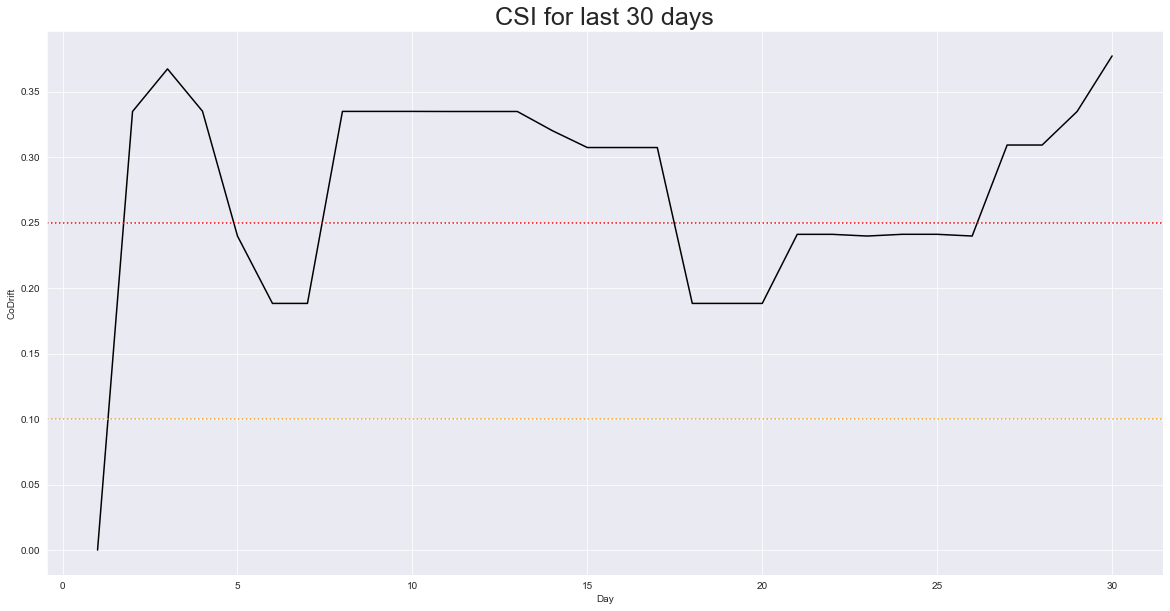

In [991]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=CSI, x="Day", y="CoDrift", color='black')
plt.title("CSI for last {} days".format(CSI['Day'].max()), fontsize=25)
plt.axhline(y=0.25, color='r', linestyle='dotted')
plt.axhline(y=0.10, color='orange', linestyle='dotted')

plt.show()

In [974]:
k=calc_csi(independent_vars_train, independent_vars_live, bins=20)

In [290]:
k

{'AppliedAmount': 0.0016430638890495065}

## Stability Index Thresholds

Existing rules of thumb are: $ metric < 0.10$ means "little shift", $0.10< metric <0.25$ means "moderate shift", and $metric > 0.25$ means "significant shift, action required". 

### Threshold function

In [137]:
def calc_threshold(d):
    for k,v in d.items():
        if v>0.25:
            d[k] = "RED: Major Shift"
        elif v>=0.1:
            d[k] = "AMBER: Minor Shift"
        elif v<0.1:
            d[k] = "GREEN: No Shift"
    return d

In [138]:
calc_threshold(calc_psi(initial_score, new_score, bins=20))

{'target variable': 'RED: Major Shift'}

In [139]:
calc_threshold(calc_csi(independent_vars_train, independent_vars_live, bins=20))

Index(['AppliedAmount'], dtype='object')


{'AppliedAmount': 'RED: Major Shift'}

Couldn't evaluate or find in history: ('l', 30)


# Concept Drifts

# K-S stat

It stands for Kolmogorov–Smirnov which is named after Andrey Kolmogorov and Nikolai Smirnov. It compares the two cumulative distributions and returns the maximum difference between them. It is a non-parametric test which means you don't need to test any assumption related to the distribution of data. In KS Test, Null hypothesis states null both cumulative distributions are similar. Rejecting the null hypothesis means cumulative distributions are different.
In data science, it compares the cumulative distribution of events and non-events and KS is where there is a maximum difference between the two distributions. In simple words, it helps us to understand how well our predictive model is able to discriminate between events and non-events.

Suppose you are building a propensity model in which objective is to identify prospects who are likely to buy a particular product. In this case, dependent (target) variable is in binary form which has only two outcomes : 0 (Non-event) or 1 (Event). "Event" means people who purchased the product. "Non-event" refers to people who didn't buy the product. KS Statistics measures whether model is able to distinguish between prospects and non-prospects.


- You need to have two variables before calculating KS. One is dependent variable which should be binary. Second one is predicted probability score which is generated from statistical model.
- Create deciles based on predicted probability columns which means dividing probability into 10 parts. 
- First decile should contain highest probability score.
- Calculate the cumulative % of events and non-events in each decile and then compute the difference between these two cumulative distribution.
**KS is where the difference is maximum**
- If KS is in top 3 decile and score above 40, it is considered a good predictive model. 
- At the same time it is important to validate the model by checking other performance metrics as well to confirm that model is not suffering from overfitting problem

https://www.listendata.com/2019/07/KS-Statistics-Python.html

In [32]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [304]:
data = pd.concat([pd.DataFrame(pred_0).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

In [305]:
data.columns = ['p', 'y']

In [338]:
data

,p,y
0,0.650954,0.0
1,0.820351,1.0
2,0.816038,1.0
3,0.833361,0.0
4,0.619828,1.0
...,...,...
18392,0.822455,1.0
18393,0.648528,0.0
18394,0.812154,1.0
18395,0.650043,0.0


In [35]:
mydf = ks(data=data,target="y", prob="p")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.363442  0.436963  1093.0      747.0     24.82%         5.34%   
2       0.341781  0.363434   704.0     1136.0     15.99%         8.12%   
3       0.324397  0.341770   459.0     1380.0     10.42%         9.86%   
4       0.188133  0.324376   557.0     1277.0     12.65%         9.13%   
5       0.180148  0.188127   374.0     1470.0      8.49%        10.51%   
6       0.174689  0.180147   332.0     1507.0      7.54%        10.77%   
7       0.171407  0.174686   256.0     1571.0      5.81%        11.23%   
8       0.166778  0.171407   244.0     1610.0      5.54%        11.51%   
9       0.164454  0.166777   253.0     1583.0      5.74%        11.31%   
10      0.159457  0.164453   132.0     1712.0      3.00%        12.23%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             24.82

In [36]:
mydf

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.363442,0.436963,1093.0,747.0,24.82%,5.34%,24.82%,5.34%,19.5
2,0.341781,0.363434,704.0,1136.0,15.99%,8.12%,40.80%,13.46%,27.3
3,0.324397,0.341770,459.0,1380.0,10.42%,9.86%,51.23%,23.32%,27.9
4,0.188133,0.324376,557.0,1277.0,12.65%,9.13%,63.87%,32.44%,31.4
5,0.180148,0.188127,374.0,1470.0,8.49%,10.51%,72.37%,42.95%,29.4
6,0.174689,0.180147,332.0,1507.0,7.54%,10.77%,79.90%,53.72%,26.2
7,0.171407,0.174686,256.0,1571.0,5.81%,11.23%,85.72%,64.95%,20.8
8,0.166778,0.171407,244.0,1610.0,5.54%,11.51%,91.26%,76.45%,14.8
9,0.164454,0.166777,253.0,1583.0,5.74%,11.31%,97.00%,87.77%,9.2


In [316]:
from scipy.stats import ks_2samp
ks_2samp(data.loc[data.y==0,"p"], data.loc[data.y==1,"p"])

Ks_2sampResult(statistic=0.3148725491589702, pvalue=6.83529217017379e-289)

6.83529217017379e-289

####  p-value should be less than 0.01 to reject the null hypothesis and conclude that distribution of events and non-events is different

In [365]:
DAY=[]
value = []
BS = []
KSS =[]
for i in range(31):
    days = i
    df = data.sample(n = 600)
    a, b = ks_2samp(df.loc[df.y==0,"p"], df.loc[df.y==1,"p"])
    loss = brier_score_loss(df.y, df.p)
    DAY.append(days)
    value.append(b)
    BS.append(loss)
    KSS.append(a)

KS = pd.DataFrame({"Day":DAY, "p-value":value, 'Kstats':KSS ,'BS':BS})

In [371]:
KS['Kstats'].mean()

0.3346250755313933

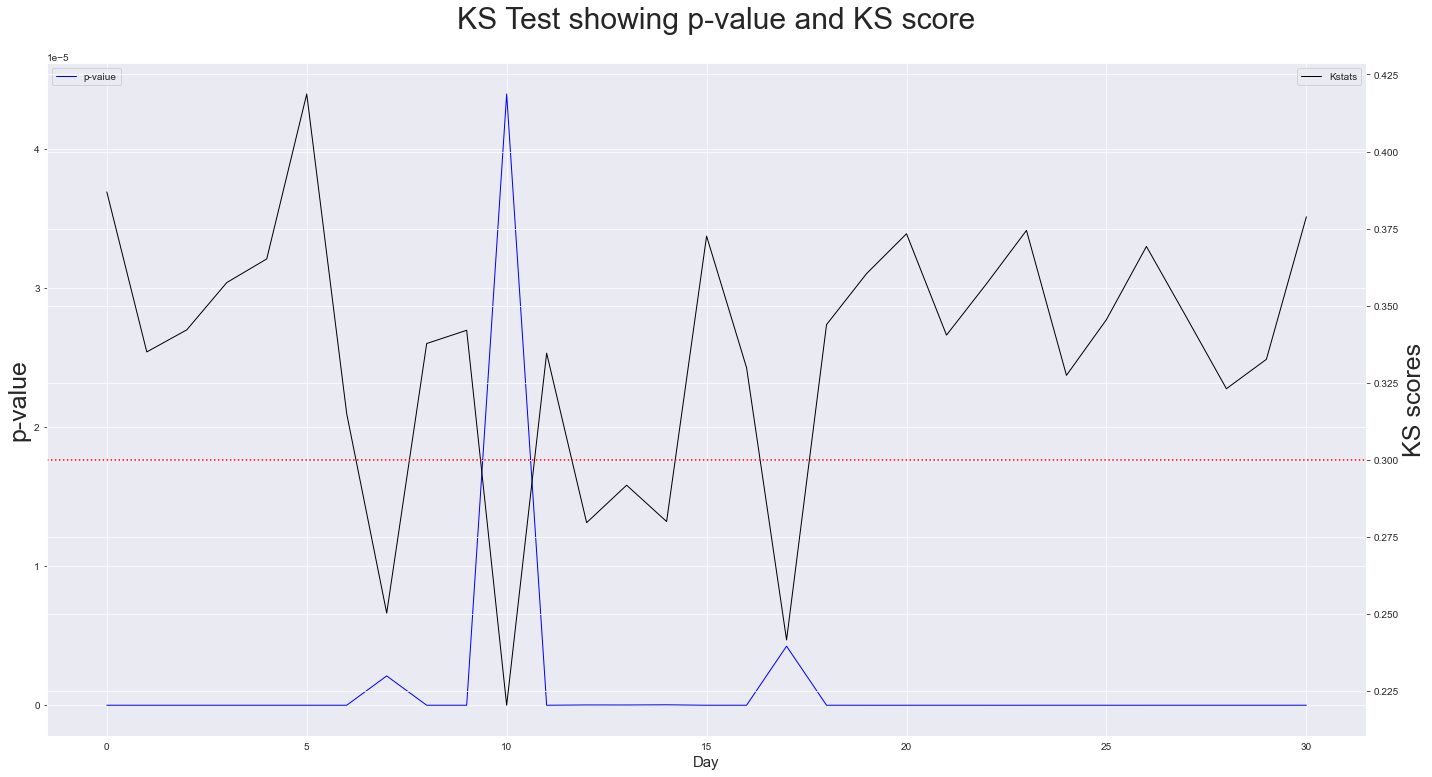

In [384]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle('KS Test showing p-value and KS score', fontsize=30, y=1.05)

ax1.plot( 'Day', 'p-value', data=KS, marker='', color='blue', linewidth=1)
ax2 = ax1.twinx() 

ax2.plot( 'Day', 'Kstats', data=KS, marker='', color='black', linewidth=1)
plt.axhline(y=0.30, color='r', linestyle='dotted')


patches, labels = ax1.get_legend_handles_labels()
ax1.legend(patches, labels, loc='upper left', fontsize=10)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, labels, loc='upper left', fontsize=14)

ax1.set_ylabel('p-value', fontsize=25)
ax2.set_ylabel('KS scores', fontsize=25)

fig.tight_layout() 
plt.legend()

ax1.set_xlabel('Day', fontsize=15)



plt.show()


In [ ]:




sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=KS, x="Day", y="p-value", color='black')
plt.title("KS test for last {} days".format(KS['Day'].max()), fontsize=25)

#plt.axhline(y=0.01, color='r', linestyle='dotted')

plt.show()

0

# Brier Score

In [331]:
from sklearn.metrics import brier_score_loss

In [39]:
loss = brier_score_loss(y_test, pred_0)

In [40]:
loss

0.16732887124323303

In [346]:
KS['BS'].mean()

0.48867117291834183

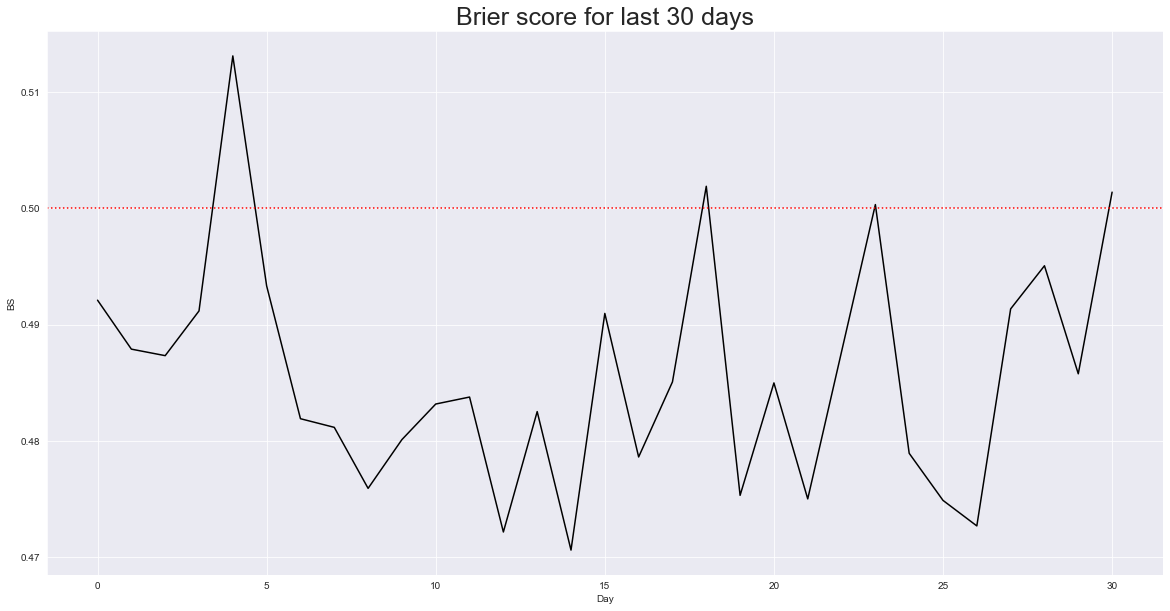

In [385]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=KS, x="Day", y="BS", color='black')
plt.title("Brier score for last {} days".format(KS['Day'].max()), fontsize=25)
plt.axhline(y=0.50, color='r', linestyle='dotted')

plt.show()

- Model skill is reported as the average Brier across the predictions in a test dataset.

- As with log loss, we can expect that the score will be suitable with a balanced dataset and misleading when there is a large imbalance between the two classes in the test set.

- We can demonstrate this by comparing the distribution of loss values when predicting different constant probabilities for a balanced and an imbalanced dataset.

- First, the example below predicts values from 0.0 to 1.0 in 0.1 increments for a balanced dataset of 50 examples of class 0 and 1.

https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/

The Brier score, named for Glenn Brier, calculates the mean squared error between predicted probabilities and the expected values.

The score summarizes the magnitude of the error in the probability forecasts.

The error score is always between 0.0 and 1.0, where a model with perfect skill has a score of 0.0.

Predictions that are further away from the expected probability are penalized, but less severely as in the case of log loss.

The skill of a model can be summarized as the average Brier score across all probabilities predicted for a test dataset.

The Brier score can be calculated in Python using the brier_score_loss() function in scikit-learn. It takes the true class values (0, 1) and the predicted probabilities for all examples in a test dataset as arguments and returns the average Brier score

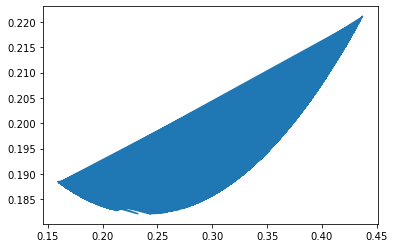

In [158]:
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
# define a balanced dataset
losses = [brier_score_loss(y_test, [y for x in range(len(y_test))]) for y in pred_0]
# plot predictions vs loss
pyplot.plot(pred_0, losses)
pyplot.show()

Predictive models are fundamentally based on finding a mapping between the input data and the target variable. Typically, our goal is to learn a model from historical data with the intention of applying the updated model to new unseen data to derive insights. However, models that assume this underlying mapping to be static over time becomes susceptible to predictive performance degradation. 

Concept drift refers to the phenomenon of dynamically evolving latent relationships within the data, causing a shift in the relationship between the $x$ independent variables and the $y$ target variable. This manifests as a change in the joint distribution of features and the label $P(x, y)$ between the source distribution and the live distribution. 

$$ P(x_s, y_s) \neq P(x_l, y_l) $$

where $s$ is the source distribution and $l$ the live distribution. 

Salient features:
- Needs predicted and actual $ P(Y | X) $
- Based on errors

From a Bayesian perspective, this concept drift can be attributed to 2 fundamental forms of changes:

1. change in $p(y | x)$ i.e posterior probability distribution changes without change in $p(x)$. Also referred as the "real" concept drift.

$$ P(y_l|x_l) \neq P(y_l|x_l) \quad \& \quad P(x_s) = P(x_l) $$

2. change in the marginal probability distribution $P(x_s) \neq P(x_l)$, which doesn't affect the decision boundary and it referred as "virtual" drift or covariate shift.

> *Note:* Exisiting studies tend to prioritise detecting posterior distribution change as this typically forms the optimal decision rule - the model prediction is a function of the posterior distribution $p(y | x)$. For classification, the prediction is the mode of $p(y | x)$ aka MAP estimate. 



$P_t(X,y) \neq P_{t+1}(X,y)$

where  denotes the joint probability distribution between the set of input variables  and the target variable  at time 

**Real concept drift** refers to the changes in the posterior probabilities of classes, i.e., changes in  that will affect the classification decision.

**Virtual drift** refers to the changes in the probability distribution of input attributes  without affecting .

# PageHinkley

The Page-Hinkley Test (pht) [12] is a sequential anal-ysis technique that can be used as a concept drift detec-tor. It computes the observed values (here we used theactual accuracy of the classiﬁer) and their mean till thecurrent moment. When a concept drift occurs, the baselearner will fail to correctly classify incoming instances,making the actual accuracy decrease. As a consequence,the average accuracy up to the current moment also de-creases. The cumulative diﬀerence between these two val-ues (UT) and the minimum diﬀerence between these twovalues (mT) are computed. Higher UTvalues indicate thatthe observed values diﬀer considerably from their previousvalues. When the diﬀerence between UTand mTis above aspeciﬁed threshold which corresponds to the magnitude ofchanges that are allowed (λ), a change in the distributionis detected. Higher λvalues result in fewer false alarms,but might miss or delay some changes

This change detection method works by computing the observed 
    values and their mean up to the current moment. Page-Hinkley
    won't output warning zone warnings, only change detections. 
    The method works by means of the Page-Hinkley test [1]_. In general
    lines it will detect a concept drift if the observed mean at 
    some instant is greater then a threshold value lambda

In [443]:
#!pip3 install skmultiflow

ERROR: Could not find a version that satisfies the requirement skmultiflow (from versions: none)
ERROR: No matching distribution found for skmultiflow


In [992]:
# Imports
import numpy as np
from skmultiflow.drift_detection import PageHinkley
ph = PageHinkley()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 2000
data_stream

array([0, 0, 1, ..., 1, 0, 1])

In [993]:
for i in range(999, 2000):
    data_stream[i] = np.random.randint(4, high=8)

In [994]:
data_stream[199]

0

In [995]:
for i in range(2000):
    ph.add_element(data_stream[i])
    if ph.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))


Change has been detected in data: 5 - of index: 1009


In [996]:
for i in range(len(pred_0)):
    ph.add_element(pred_0[i])
    if ph.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))


In [997]:
p_original = pred_0.copy()

0.6611249914760434
0.8370928478221774
0.8287890834946949
Change has been detected in data: 0.8287890834946949 - of index: 2
0.8333613254324826
0.6198278895184032
0.8374719890087755
0.8365157346530353
Change has been detected in data: 0.8365157346530353 - of index: 6
0.8332230447829054
0.6638662315998528
0.850997370172597
0.8111855192328393
0.6751766464176764
0.8336958038732978
0.6616154150319331
0.8261523742764405
0.8350310685386002
Change has been detected in data: 0.8350310685386002 - of index: 15
0.8220050261395613
0.6416476799612948
0.6758390439262787
0.6602618485920662
0.8373924900440803
Change has been detected in data: 0.8373924900440803 - of index: 20
0.8322971656837295
0.7168440618429627
0.8720886428426154
0.5893951076370478
0.8471200600269332
0.8381979006273004
Change has been detected in data: 0.8381979006273004 - of index: 26
0.8327664967217911
0.8323228752816793
0.8346802909360119


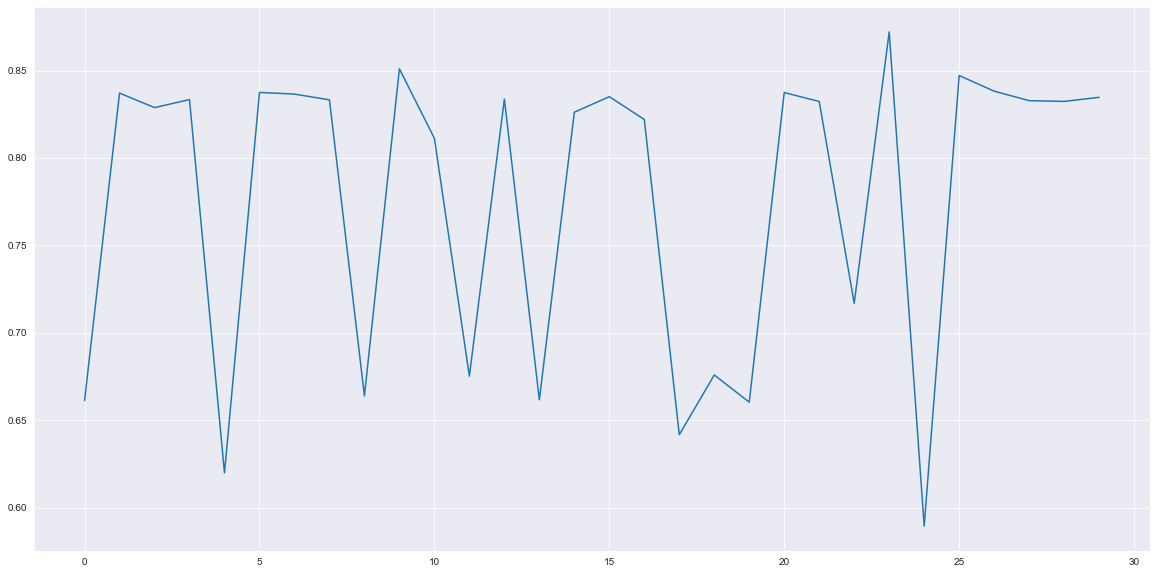

[2, 6, 15, 20, 26]


In [1016]:
import random 


mu=p_original.mean()
sd=p_original.std()

p_live = p_original.copy()

ph = PageHinkley(min_instances=3, delta=0.005, threshold=.1, alpha=0.9999)
index=[]
value=[]
for i in range(len(p_live[:30])):
    
    zero = random.randint(0, 1)
    #noise = np.random.normal(mu, sd)
    noise = p_original[i]/(randint(5, 9)**2)
    noise = noise * zero
    #print(noise)
    
    
    p_live[i] = p_live[i] + noise
    ph.add_element(p_live[i])
    print(p_live[i])
  
   
    
    if ph.detected_change():
        print('Change has been detected in data: ' + str(p_live[i]) + ' - of index: ' + str(i))
        index.append(i)
        value.append(p_live[i])
    

    
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
plt.plot(p_live[:30])
plt.show()

print(index)

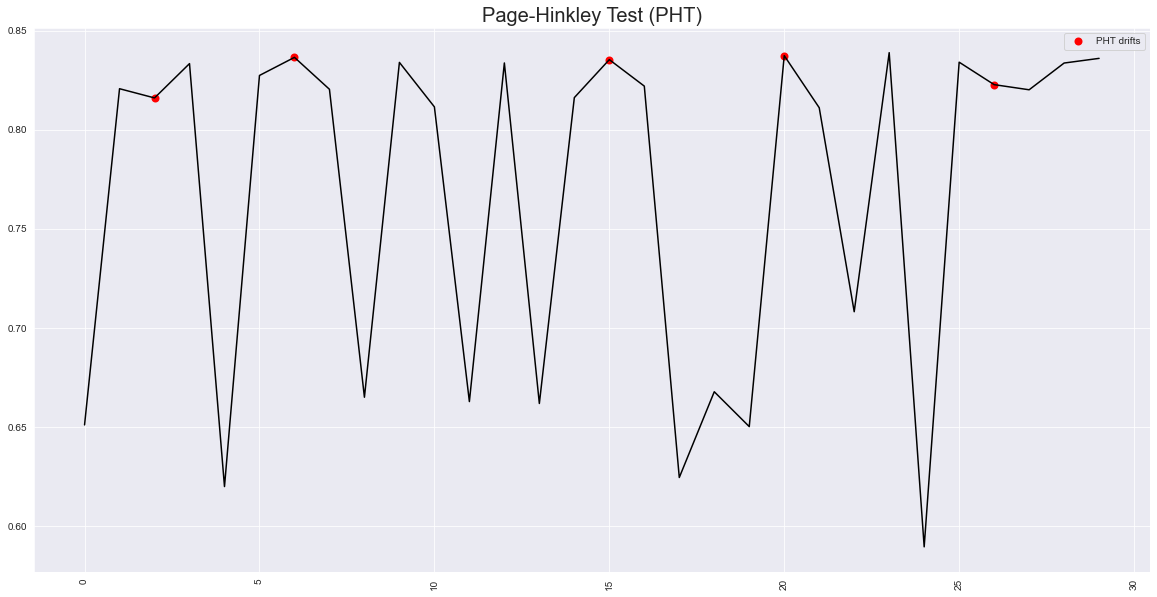

In [1006]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
plt.title('Page-Hinkley Test (PHT)', fontsize=20)
plt.plot(p_live[:30], color='black')
plt.scatter(index, value, color='red',  marker='o', linewidth=2, label = 'PHT drifts')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.show()

### [Different types of concept drift] (https://arxiv.org/pdf/2004.05785.pdf)


### [DDM: Drift Detection Method](https://www.cs.upc.edu/~abifet/EDDM.pdf)

This is one of the earliest and simplest. It’s based on prediction error rate. 

<!-- Incoming data instance is a Bernoulli trial variable indicating whether error occurred or not in model prediction. Incoming data is considered as a sequence with binomial distribution. -->

For each point $i$ in the sequence that is being sampled, the error rate is the probability of missclassiying $p_i$ with standard deviation given by $s_i$.

If the error of the algorithm has a significant increase, the class distribution is changing and thus the actual decision model is likely to be inappropriate. 

1) Begin by evaluating $p_i$ and $s_i$.

2) Determine & store the values of $p_i$ and $s_i$ when $p_i + s_i$ reaches its minimum value during the process (obtaining $p_{min}$ and $s_{min}$).

3) Check for the following condition triggers:
- **Warning level:** $p_i + s_i \geq p_{min} + 2s_{min} $ 
    - *beyond this level examples must be stored in anticipation of possible change in concept.*
    
- **Drift level:** $p_i + s_i \geq p_{min} + 3s_{min} $ - beyond this level concept drift is supposed to be true. 
    - *Therefore, the model induced by the learning method is no longer applicable and should be reset. Learn a new model using the examples stored since the warning level triggered. The values for $p_{min}$ and $s_{min}$ must be reset too.*


the error-rate (pi) and the standard deviation(si=ppi(1 −pi)/i) are computed and these values arestored when pi+sireaches its minimum (obtaining pminand smin). When pi+si≥pmin + 2 ·smin, a warninglevel is reached and instances are stored in anticipation ofa possible concept drift. If pi+si≥pmin + 3 ·smin, a driftlevel is reached, indicating a context change. The baselearner and the values of pmin and smin are then reset anda new base learner is trained on the examples stored sincethe warning level

### [EDDM: Early Drift Detection Method](https://www.cs.upc.edu/~abifet/EDDM.pdf)

Similar to DDM however, it is considered to be better for gradual drift. 

The basic idea is to consider the distance between two errors classification instead of considering only the number of errors. While the learning method is learning, it will improve the predictions and the distance between two errors will increase.

1) Calculate the **average distance between two errors** ($p′_i$) and its **standard deviation** ($s′_i$).

2) Determine & store values of $p′_i$ and $s′_i$, when $p′_i + 2s′_i$ reaches its maximum value (obtaining $p′_{max}$ and $s′_{max}$).

3) Calculate the warning EEDM ratio $\frac{p′_i + 2s′_i}{p′_{max} + 2s′_{max}}$.

4) When this drops below a threshold of 0.95 - drift is considered to have occurred. 

Two properties:

- warn and start caching
$\frac{p′_i + 2s′_i}{p_{max} + 2s_{max}} \leq 0.95$
- alert and reset max
$\frac{p′_i + 2s′_i}{p_{max} + 2s_{max}} \leq 0.90$


Drift Detection Method (DDM)
This is one of the earliest and simplest. It’s based on prediction error rate. Incoming data instance is a Bernoulli trial variable indicating whether error occurred or not in model prediction. Incoming data is considered as a sequence with binomial distribution.

The algorithm tracks minimum probability of error (p) rate and the min std deviation (s) of the binomial distribution, when (p + s) reaches the minimum. Drift is considered to be present when the sum probability of error and std deviation of the error rate exceeds sum of minimum probability of error and a multiple of the minimum std deviation i.e (p + s) is greater than (pmin + 3 * pmin). The recommended multiplying factor is 3.

Early Drift Detection Method (EDDM)
This is similar to DDM, except that it is is considered better for gradual drift. It’s based on the mean (m) and std deviation (s) of the distance between two errors.

It tracks when (m + 2 *s) reaches it’s maximum value and saves them as as mmax and smax. When the ratio (m + 2 *s) / (mmax + 2 * smax) drops below a threshold drift is considered to have occurred. Recommended value of the threshold is 0.9

The algorithm is based on the likelihood of drift occurring
when the distance between errors is smaller, thus it calculates the average
distance between two recent errors, and it detects a drift if a predefined
threshold is met. EDDM achieves an early detection in presence of incremental changes, even when that change is slow, as it is more sensitive than
the previous method. However, its sensitivity can be considered a drawback
when the data contains a lot of noise.



EDDM (Early Drift Detection Method) [1] aims to improve the detection rate of gradual concept drift in DDM, while keeping a good performance against abrupt concept drift.

This method works by keeping track of the average distance between two errors instead of only the error rate. For this, it is necessary to keep track of the running average distance and the running standard deviation, as well as the maximum distance and the maximum standard deviation.

The algorithm works similarly to the DDM algorithm, by keeping track of statistics only. It works with the running average distance ($p_i^'$) and the running standard deviation (s_i^'), as well as p^'_{max} and s^'_{max}, which are the values of p_i^' and s_i^' when (p_i^' + 2 * s_i^') reaches its maximum.

Like DDM, there are two threshold values that define the borderline between no change, warning zone, and drift detected. These are as follows:

if $frac{(p_i^' + 2 * s_i^')}{(p^'_max + 2 * s^'_max)}$ < alpha -> Warning zone

if (p_i^' + 2 * s_i^')/(p^'_{max} + 2 * s^'_{max}) < eta -> Change detected

alpha and eta are set to 0.95 and 0.9, respectively.

In [237]:
p_original = pred_0.copy()

## DDM

Change has been detected in data: 0.8385467719640534 - of index: 23


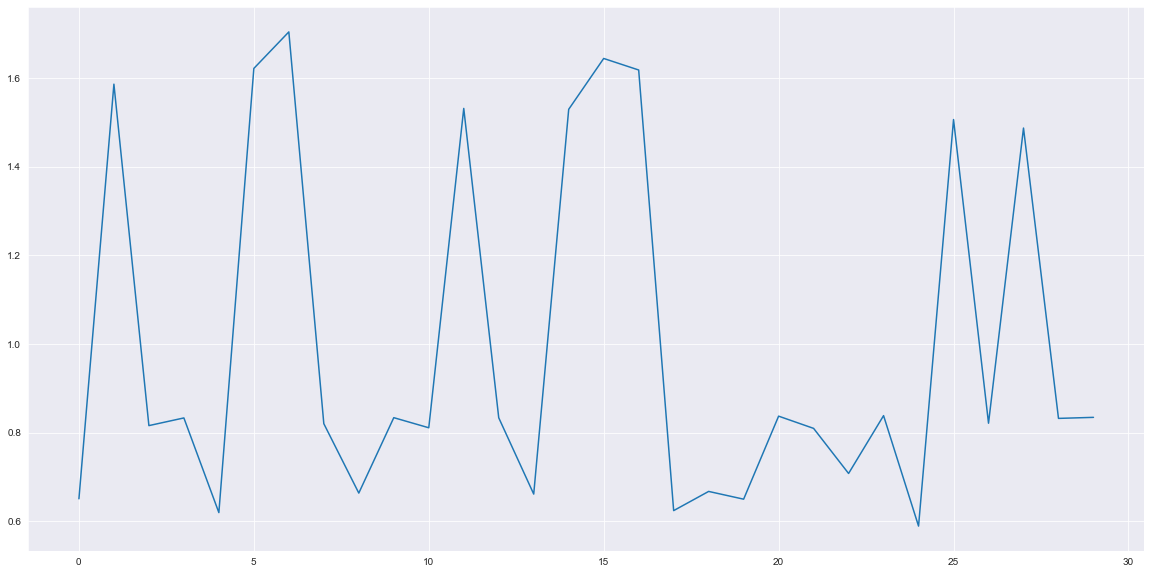

In [398]:
import random 


mu=p_original.mean()
sd=p_original.std()

p_live = p_original.copy()

from skmultiflow.drift_detection import DDM
DDM = DDM(min_num_instances=3, warning_level=2.0, out_control_level=1)

for i in range(len(p_live[:30])):
    
    zero = random.randint(0, 1)
    noise = np.random.normal(mu, sd)
    noise = noise * zero
    
    
    
    p_live[i] = p_original[i] + noise
    DDM.add_element(p_live[i])
    #print (p_live[i])
   
    
    if DDM.detected_change():
        print('Change has been detected in data: ' + str(p_live[i]) + ' - of index: ' + str(i))
    
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
palette = sns.color_palette("mako_r", 6)
plt.plot(p_live[:30])
plt.show()

## EDDM

The Early Drift Detection Method (eddm) [11] is sim-ilar to ddm but, instead of using the error-rate, it usesthe distance-error-rate of the base learner to identify if adrift has occurred. This metric computes the number ofexamples between two classiﬁcation errors. When thereis no concept drift, the base learner improves its predic-tions and the distance between errors increases. On theother hand, when a concept drift occurs, the base learnercommits more mistakes and the distance between error de-creases. As described in the original paper, eddm is bet-ter suited to deal with slow gradual concept drifts. Theaverage distance between two errors (pi) and its standarddeviation (si) are computed. These values are stored whenpi+ 2 ·sireaches its maximum value (obtaining pmax andsmax). This value indicates that the base learner best ap-proximates the current concept.Similarly to ddm,eddm deﬁnes two thresholds. When(pi+ 2 ·si)/(pmax + 2 ·smax)< α, the warning level isreached and the instances are stored anticipating a conceptdrift. The drift level is reached when (pi+ 2 ·si)/(pmax +2·smax)< β, indicating a change in the context. Thevalues of αand βare 0.95 and 0.9, respectively, the samechosen in the original paper after some experimentation.The base learner and the values of pmax and smax are resetand a new base learner is trained on the examples storedsince the warning level

In [542]:
def find_eddm_max_index(df, metric, max_metric):
    return df[df[metric] == max_metric].index[0]

def create_eddm_df(error):
    df = pd.DataFrame({'Error':error})
    df['DiffError'] = df['Error'].diff()
    df['pi'] = df['DiffError'].rolling(window=len(error), min_periods=1).mean()
    df['si'] = df['DiffError'].rolling(window=len(error), min_periods=1).std(ddof=0)
    df['pi+2si'] = df['pi']+(2*df['si'])
    df['max_pi+2si'] = df['pi+2si'].rolling(window=len(error), min_periods=1).max()
    
    df = df.fillna(0)

    df['index_max_pi+2i'] = df['max_pi+2si'].map(lambda x:find_eddm_max_index(df, 'pi+2si', x))
    df['pi_max'] = df['pi'][df['index_max_pi+2i']].to_numpy()
    df['si_max'] = df['si'][df['index_max_pi+2i']].to_numpy()
    
    return df

def check_eddm_threshold(eddm_signal):
    eddm_warning_thresh = 0.95
    eddm_drift_thresh = 0.90
    
    eddm_warning_boolean = eddm_signal < eddm_warning_thresh
    eddm_drift_boolean = eddm_signal < eddm_drift_thresh
    
    return eddm_warning_boolean, eddm_drift_boolean

#main function
def eddm_warning(error, time):
    df = create_eddm_df(error)
    df['Dates'] = time
    df['EDDM_signal'] = df['pi+2si']/(df['pi_max']+(2*df['si_max']))
    eddm_warning_thresh, eddm_drift_thresh = check_eddm_threshold(df['EDDM_signal'])
    df['EDDM_Warn'] = eddm_warning_thresh
    df['EDDM_Drift'] = eddm_drift_thresh

    return df

def plot_eddm(error, time):
    eddm_data = eddm_warning(error, time)
    
    plt.figure(figsize=(20,10))
    plt.title('EDDM without Reset', fontsize=20)
    #plt.figure(figsize=(15,6))
    plt.plot(eddm_data['Dates'], eddm_data['Error'], label='Errors', color='black')
    plt.scatter(eddm_data['Dates'][eddm_data['EDDM_Drift']], eddm_data['Error'][eddm_data['EDDM_Drift']], color='red', marker='o', label = 'EDDM drift level')
    plt.legend(fontsize=15)
    plt.xlabel('Days')
    plt.ylabel('PSI over time')
    plt.show()
    
    

In [543]:
dataeddm=pd.read_csv('E_DDM.csv')

In [544]:
stream = dataeddm['MCE'].copy()

In [580]:
psi_stream = stream.sample(60).reset_index(drop=True) #[:60] #p_live[:60] #data['MCE'].sample(60)

time = np.arange(0, 60)
data = pd.DataFrame({'Error':psi_stream, 'Days': time})

In [581]:
df = eddm_warning(data['Error'], data['Days'])
df.head(10)

,Error,DiffError,pi,si,pi+2si,max_pi+2si,index_max_pi+2i,pi_max,si_max,Dates,EDDM_signal,EDDM_Warn,EDDM_Drift
0,0.7663,0.0000,0.000000,0.000000,0.000000,0.0000,0,0.0000,0.0000,0,NaN,False,False
1,0.6288,-0.1375,-0.137500,0.000000,-0.137500,-0.1375,1,-0.1375,0.0000,1,1.000000,False,False
2,0.7201,0.0913,-0.023100,0.114400,0.205700,0.2057,2,-0.0231,0.1144,2,1.000000,False,False
3,0.6517,-0.0684,-0.038200,0.095817,0.153434,0.2057,2,-0.0231,0.1144,3,0.745913,True,True
4,0.6268,-0.0249,-0.034875,0.083180,0.131484,0.2057,2,-0.0231,0.1144,4,0.639205,True,True
5,0.6204,-0.0064,-0.029180,0.075265,0.121350,0.2057,2,-0.0231,0.1144,5,0.589937,True,True
6,0.7613,0.1409,-0.000833,0.093479,0.186125,0.2057,2,-0.0231,0.1144,6,0.904837,True,False
7,0.6881,-0.0732,-0.011171,0.090174,0.169176,0.2057,2,-0.0231,0.1144,7,0.822439,True,True
8,0.7296,0.0415,-0.004587,0.086130,0.167672,0.2057,2,-0.0231,0.1144,8,0.815127,True,True
9,0.6713,-0.0583,-0.010556,0.082940,0.155324,0.2057,2,-0.0231,0.1144,9,0.755098,True,True


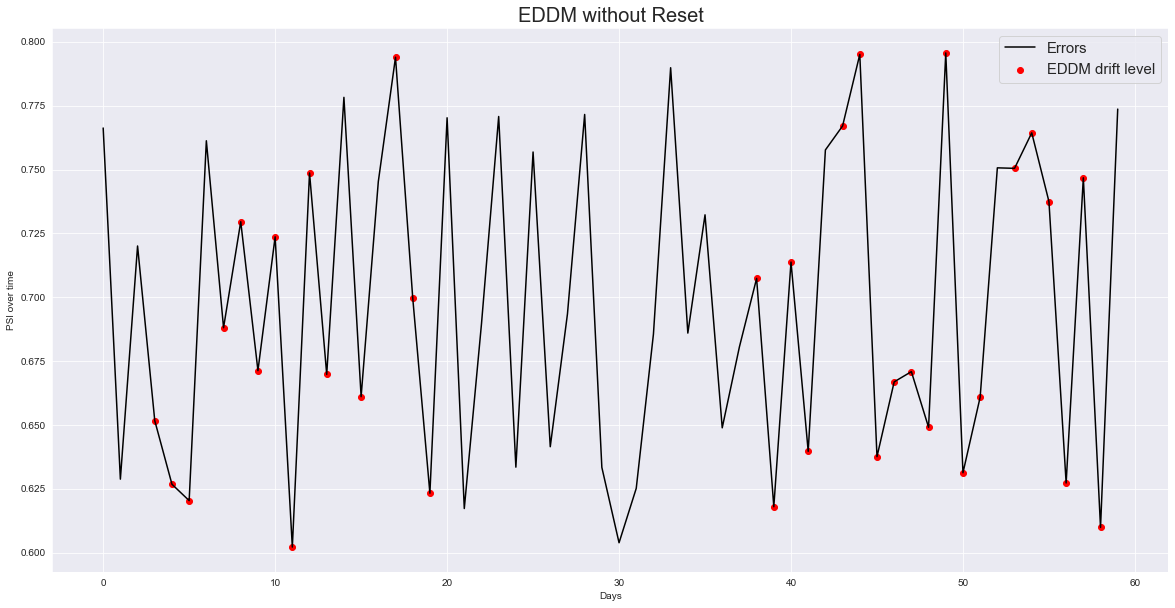

In [582]:
plot_eddm(data['Error'], data['Days'])

In [583]:
#time = np.arange(0, 60)
#data = pd.DataFrame({'Error':psi_stream, 'Days': time})

In [584]:
df = eddm_warning(data['Error'], data['Days'])  

drift_time = []
drift_error = []

for i in range(0, len(df)):
    if (df['EDDM_Drift'][i] == True):
        error = data['Error'].iloc[i:,]
        time = data['Days'].iloc[i:,]
        df = eddm_warning(error, time) 

        drift_time.append(data['Days'].iloc[i])
        drift_error.append(data['Error'].iloc[i])
    
        print("Drift time: {}, Drift error: {}".format(data['Days'].iloc[i], data['Error'].iloc[i]))
        
    

Drift time: 3, Drift error: 0.6517
Drift time: 8, Drift error: 0.7296
Drift time: 13, Drift error: 0.6698
Drift time: 18, Drift error: 0.6999
Drift time: 21, Drift error: 0.6173
Drift time: 29, Drift error: 0.6334
Drift time: 38, Drift error: 0.7074
Drift time: 41, Drift error: 0.6397
Drift time: 44, Drift error: 0.7951
Drift time: 48, Drift error: 0.6491
Drift time: 51, Drift error: 0.6609
Drift time: 54, Drift error: 0.7644
Drift time: 58, Drift error: 0.6099


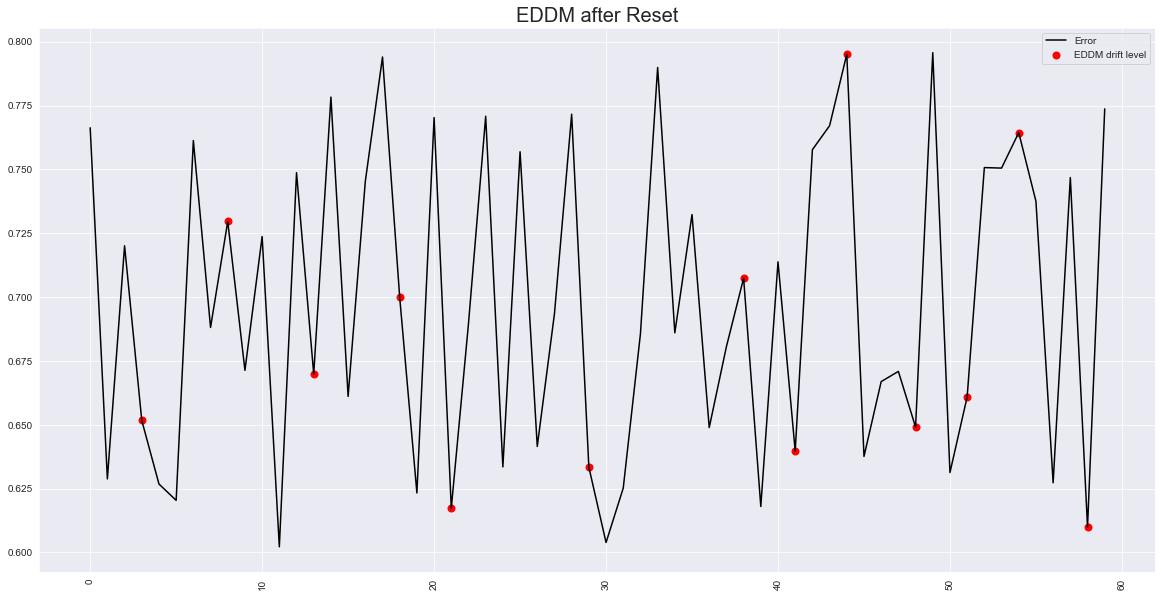

In [585]:
plt.figure(figsize=(20,10))
plt.title('EDDM after Reset', fontsize=20)
plt.plot(data['Days'], data['Error'], label='Error', color='black')
plt.scatter(drift_time, drift_error, color='red',  marker='o', linewidth=2, label = 'EDDM drift level')
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.show()